<a href="https://colab.research.google.com/github/miraclehimself/Advanced_ML/blob/main/clustering_week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn -q --user
# need to restart kernel, if latest versions not already installed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(
    style='ticks',
    context='notebook',
    font_scale=0.8,
    rc={'figure.figsize': (8,6)}
)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
from sklearn import datasets

In [ ]:
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

In [ ]:
X.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

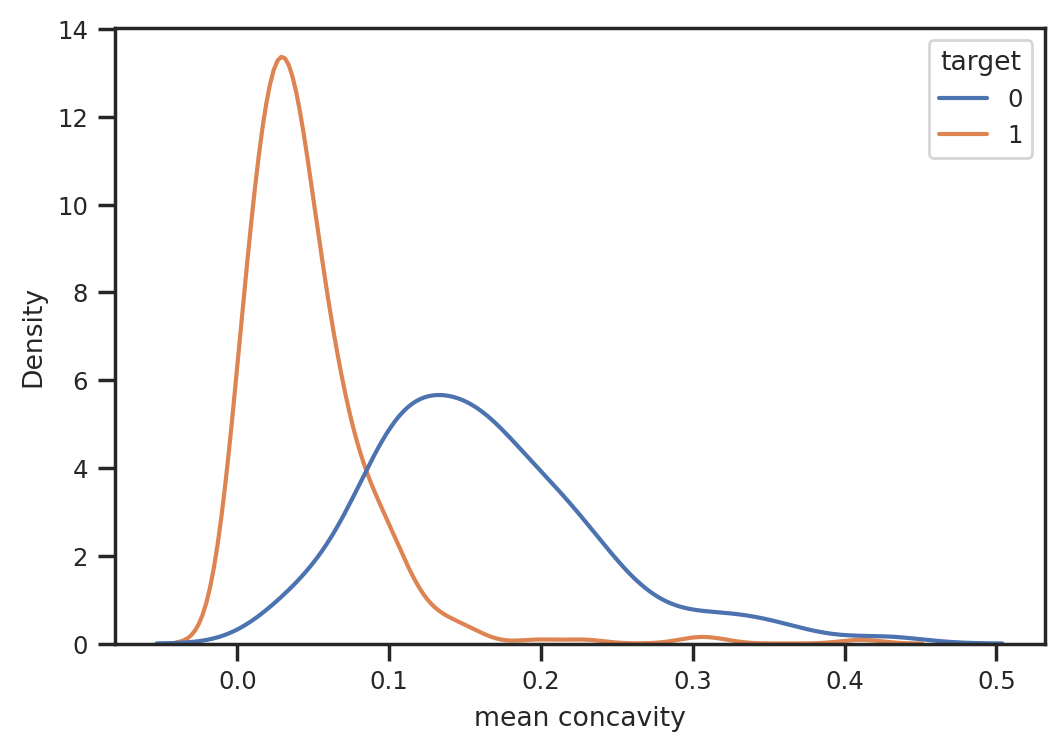

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
sns.kdeplot(x=X['mean concavity'], hue=y, common_norm=False);

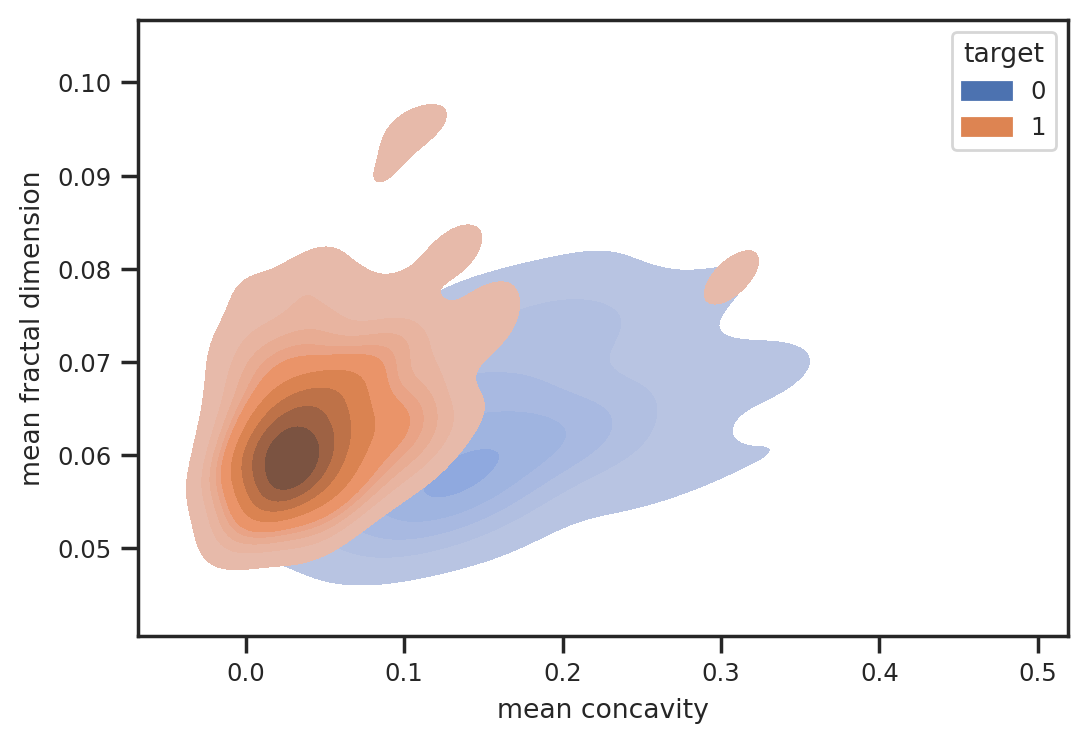

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
sns.kdeplot(x=X['mean concavity'], y=X['mean fractal dimension'], hue=y, fill=True);

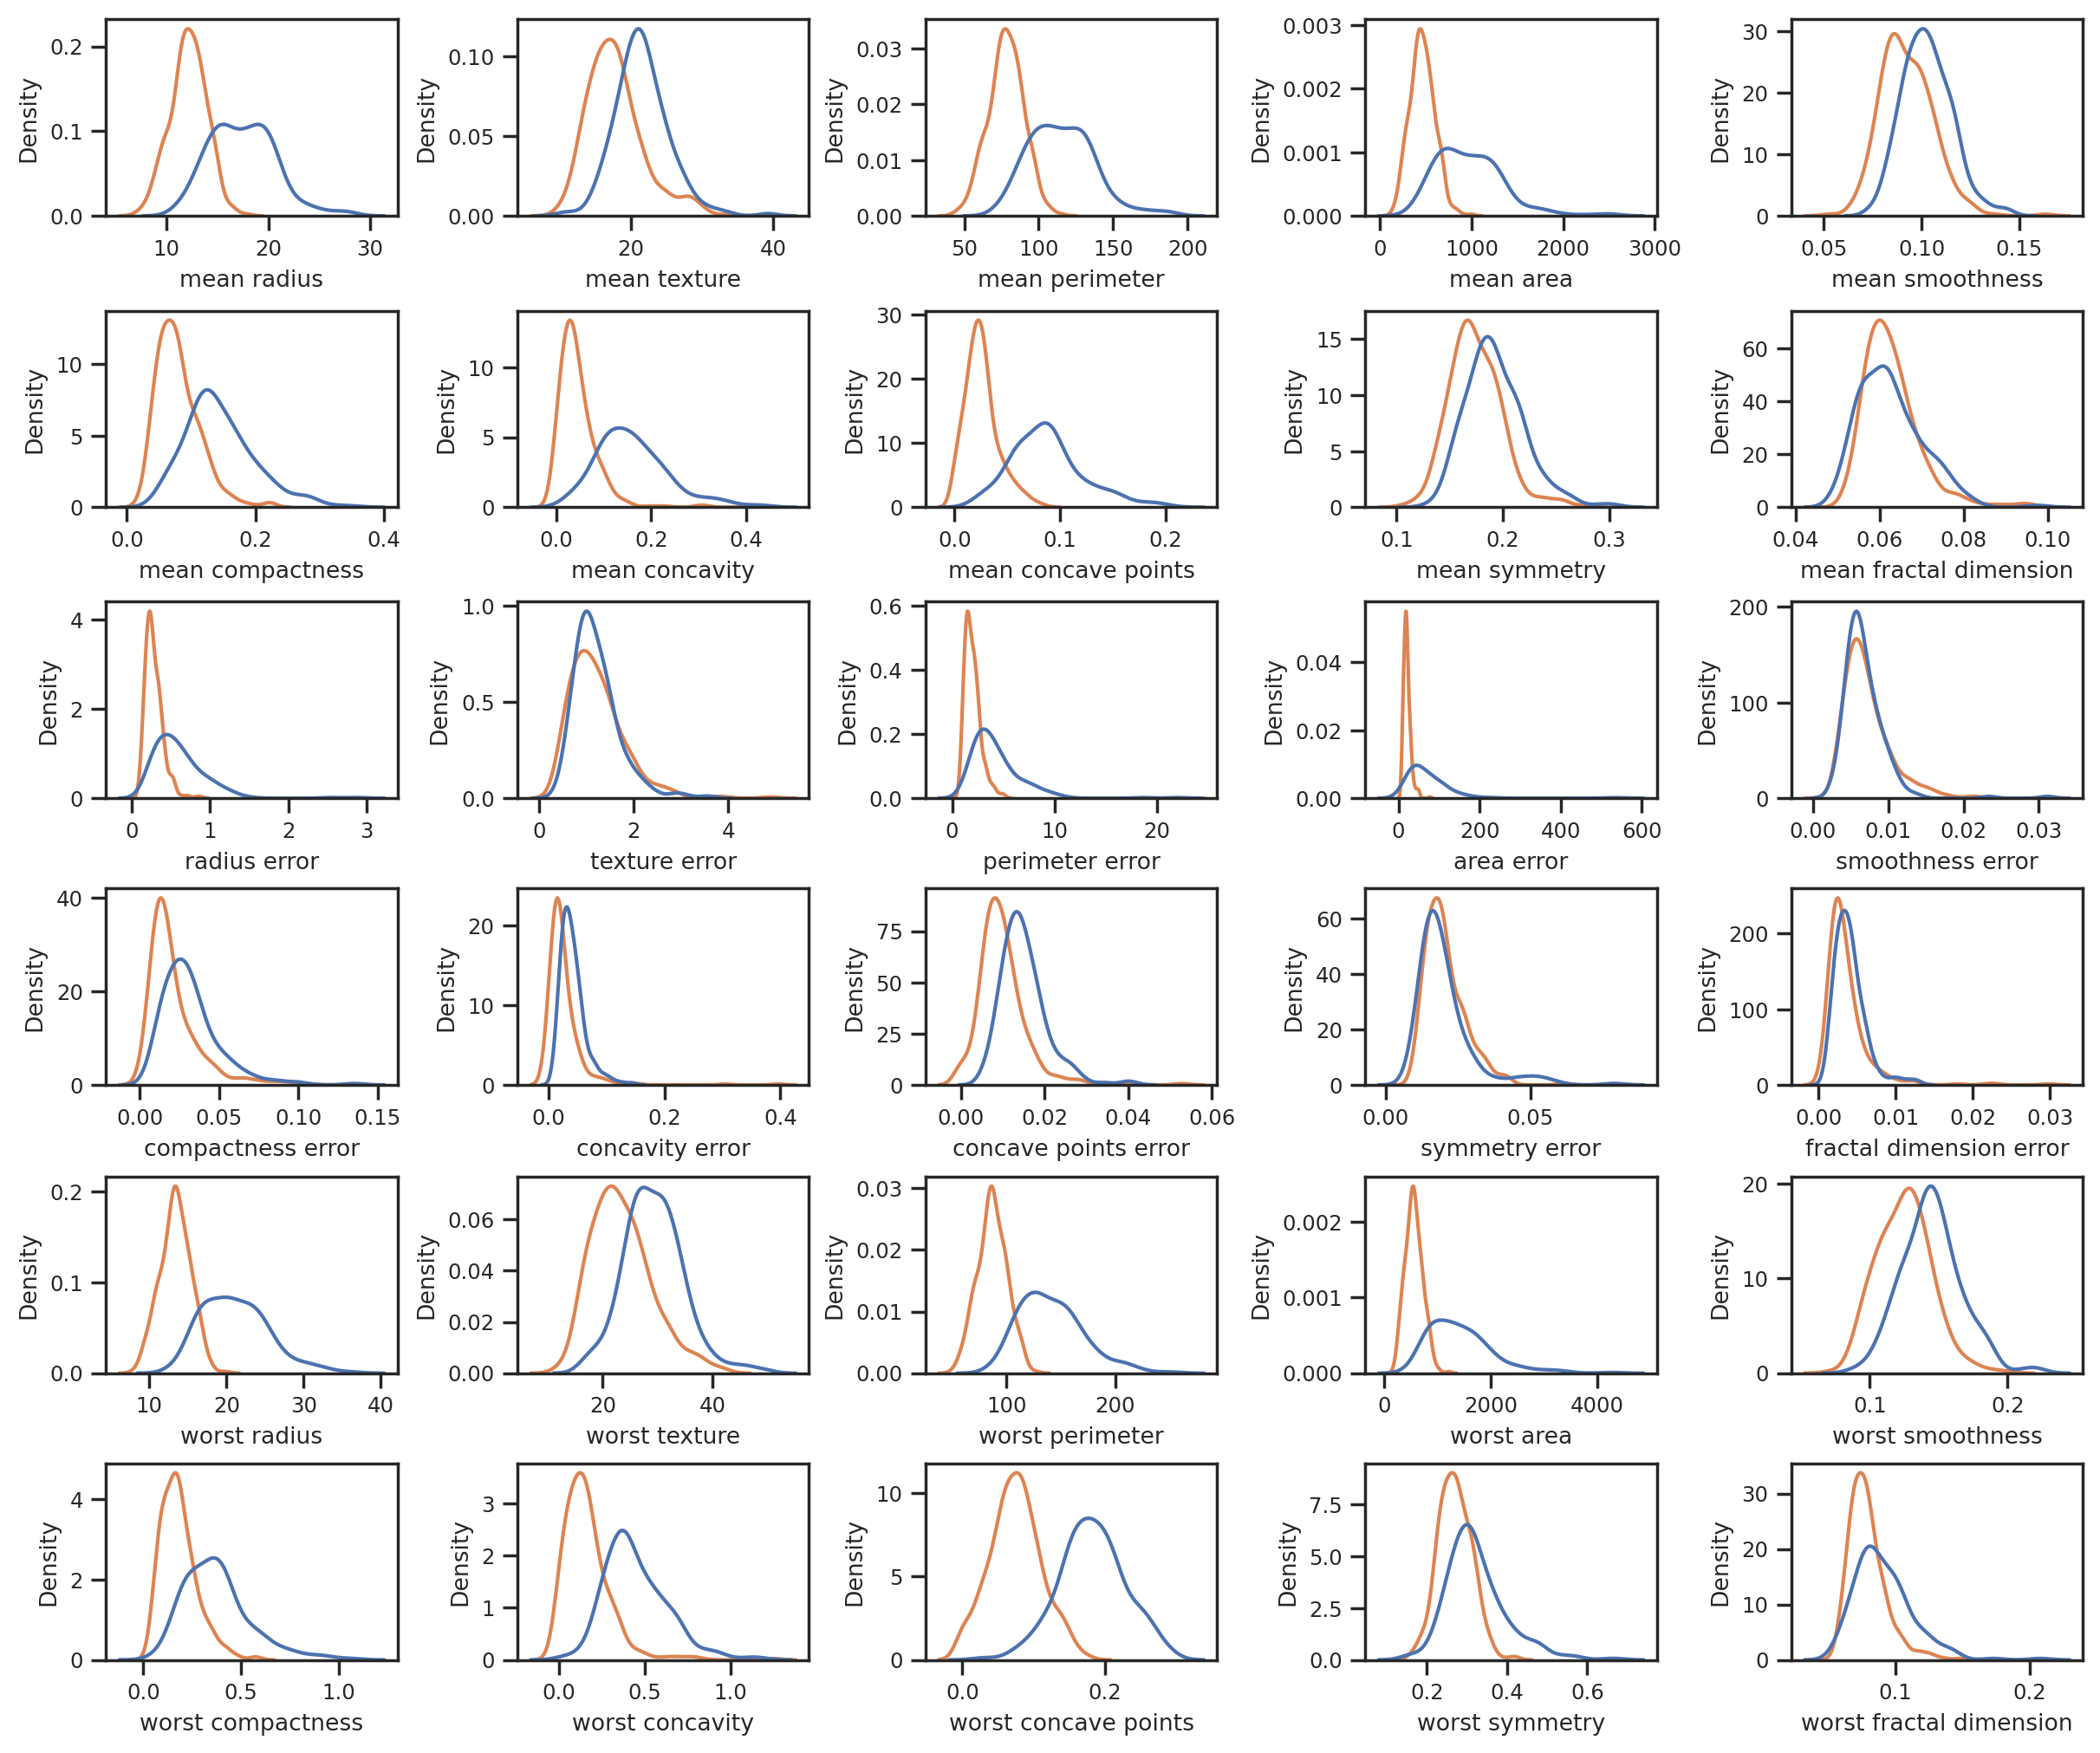

In [ ]:
fig, axs = plt.subplots(6, 5, figsize=(12,10), constrained_layout=True)
for col, ax in zip(X.columns, axs.ravel()):
    sns.kdeplot(x=X[col], hue=y, common_norm=False, ax=ax);
    ax.get_legend().remove()

In [ ]:
pd.DataFrame(
    StandardScaler().fit_transform(X),
    columns=X.columns
).head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.88669,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015


In [ ]:
from sklearn.pipeline import make_pipeline
transformation = make_pipeline(StandardScaler()).set_output(transform='pandas')
X_scaled = transformation.fit_transform(X)

In [ ]:
X_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)

In [ ]:
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.491211,-0.241463,-0.507934,-0.484963,-0.303238,-0.518458,-0.575769,-0.585878,-0.306374,-0.127513,...,-0.524622,-0.253090,-0.538661,-0.504829,-0.306840,-0.488556,-0.536198,-0.581049,-0.303756,-0.323099
1,0.956970,0.470415,0.989550,0.944799,0.590764,1.010052,1.121706,1.141400,0.596874,0.248420,...,1.022061,0.493067,1.049412,0.983501,0.597781,0.951798,1.044613,1.131992,0.591774,0.629457


In [ ]:
y_pred = kmeans.predict(X_scaled)

In [ ]:
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int32)

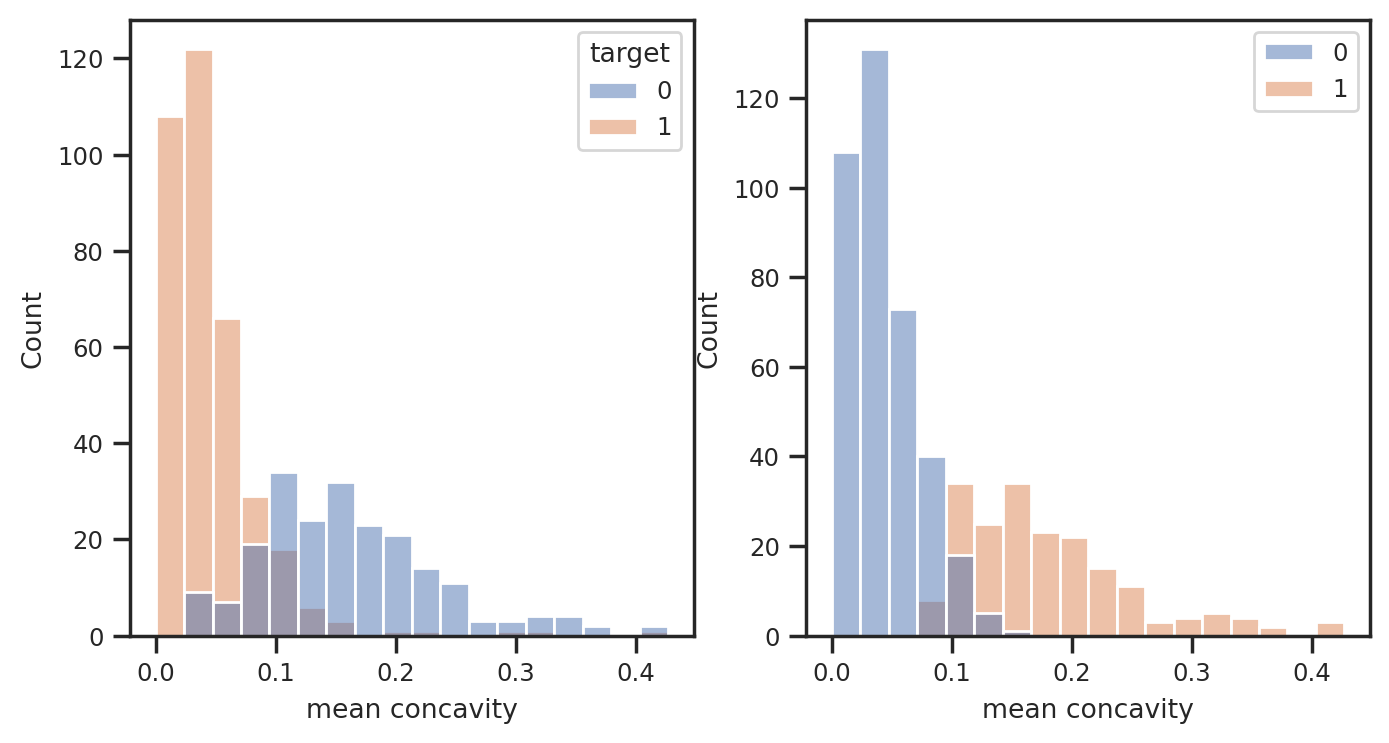

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
sns.histplot(x=X['mean concavity'], hue=y, ax=axs[0]);
sns.histplot(x=X['mean concavity'], hue=y_pred, ax=axs[1]);